<a href="https://colab.research.google.com/github/thais-alves-carvalho/ons_data/blob/main/dados_abertos_ons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import seaborn as sns
import numpy as np


# Leitura Dados entrada

In [ ]:
# informar os anos de interesse da ENA DIÁRIA POR SUBSISTEMA
anos = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
dados = pd.DataFrame()
#print(dados)
for ano in anos:

  dado_ano= pd.read_csv('https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ena_subsistema_di/ENA_DIARIO_SUBSISTEMA_' + ano +'.csv', encoding="ISO-8859-1", 
                     sep=";",
                    thousands=",", decimal=".")
  #print(dado_ano.head())
  dados = pd.concat([dados,dado_ano])

Após a leitura de dados teremos o seguinte data frame

In [ ]:
dados.head()

,id_subsistema,nom_subsistema,ena_data,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt
0,N,NORTE,2013-01-01,3659.0,38.330002,3639.0,38.119999
1,NE,NORDESTE,2013-01-01,4304.0,31.160000,4190.0,30.340000
2,S,SUL,2013-01-01,9188.0,122.540001,8745.0,116.629997
3,SE,SUDESTE,2013-01-01,29592.0,53.810001,29338.0,53.349998
4,N,NORTE,2013-01-02,3641.0,38.139999,3629.0,38.009998


In [ ]:
# transformar a coluna de data em datetime
dados['ena_data'] = pd.to_datetime(dados['ena_data'])


In [ ]:
dados['ena_data']

0     2013-01-01
1     2013-01-01
2     2013-01-01
3     2013-01-01
4     2013-01-02
         ...    
379   2023-04-05
380   2023-04-06
381   2023-04-06
382   2023-04-06
383   2023-04-06
Name: ena_data, Length: 14992, dtype: datetime64[ns]

#Selecionando dado de interesse 


In [ ]:
dados.columns

Index(['id_subsistema', 'nom_subsistema', 'ena_data', 'ena_bruta_regiao_mwmed',
       'ena_bruta_regiao_percentualmlt', 'ena_armazenavel_regiao_mwmed',
       'ena_armazenavel_regiao_percentualmlt'],
      dtype='object')

In [ ]:
# dentre todas as variáveis do dataframe dados iremos selecionar os dados de interesse, neste caso % MLT por dia e submercado
obj = {'id_subsistema': dados['id_subsistema'], 'ena_data': dados['ena_data'], 'perc_mlt': dados['ena_bruta_regiao_percentualmlt']}
df_percentualmlt = pd.DataFrame(data=obj)
df_percentualmlt

,id_subsistema,ena_data,perc_mlt
0,N,2013-01-01,38.330002
1,NE,2013-01-01,31.160000
2,S,2013-01-01,122.540001
3,SE,2013-01-01,53.810001
4,N,2013-01-02,38.139999
...,...,...,...
379,SE,2023-04-05,94.707100
380,N,2023-04-06,109.480904
381,NE,2023-04-06,41.727200
382,S,2023-04-06,61.815899


In [ ]:
# Dúvida sobre como agrupar os dados por mês 
# dados['data_mes'] = dados['ena_data'].map(lambda x :  x.month)
# dados['data_ano'] = dados['ena_data'].map(lambda x :  x.year)

# mesma coisa aqui porém os dados estão em MWmed
obj = {'id_subsistema': dados['id_subsistema'], 'ena_data': dados['ena_data'], 'ena_bruta_regiao_mwmed': dados['ena_bruta_regiao_mwmed']}
df_ena_bruta_regiao_mwmed = pd.DataFrame(data=obj)
df_ena_bruta_regiao_mwmed


,id_subsistema,ena_data,ena_bruta_regiao_mwmed
0,N,2013-01-01,3659.000000
1,NE,2013-01-01,4304.000000
2,S,2013-01-01,9188.000000
3,SE,2013-01-01,29592.000000
4,N,2013-01-02,3641.000000
...,...,...,...
379,SE,2023-04-05,51852.367188
380,N,2023-04-06,29524.638672
381,NE,2023-04-06,4795.212891
382,S,2023-04-06,4021.144043


In [ ]:
df_percentualmlt[df_percentualmlt['id_subsistema']== 'SE']['perc_mlt']

3       53.810001
7       54.549999
11      54.930000
15      54.490002
19      53.990002
          ...    
367    100.196800
371     98.200897
375     96.426201
379     94.707100
383     93.400803
Name: perc_mlt, Length: 3748, dtype: float64

# Funções do pandas que poderão ser usadas 

Group By


ref https://www.statology.org/pandas-group-by-month/


Pivot e Pivot_table

ref https://www.kite.com/blog/python/pandas-pivot-table/

ref https://www.vooo.pro/insights/pivot-table-em-pandas-explicado/


## Exemplo de uso pivot

In [ ]:
# df.pivot(index='foo', columns='bar', values='baz')
df_percentualmlt.pivot(index='ena_data', columns='id_subsistema', values='perc_mlt')

id_subsistema,N,NE,S,SE
ena_data,,,,
2013-01-01,38.330002,31.160000,122.540001,53.810001
2013-01-02,38.139999,30.709999,126.320000,54.549999
2013-01-03,38.029999,30.790001,127.559998,54.930000
2013-01-04,38.000000,31.129999,119.559998,54.490002
2013-01-05,38.200001,30.790001,111.510002,53.990002
...,...,...,...,...
2023-04-02,113.870003,46.162800,75.309196,100.196800
2023-04-03,112.469398,44.957901,69.213699,98.200897
2023-04-04,110.780899,43.828899,63.643600,96.426201


# Exemplo de uso group by




In [ ]:
# # by=[b.index.month, b.index.year] #
#df_ena_month.groupby(by= [df_ena_month.ena_data.dt.year, df_ena_month.ena_data.dt.month])['perc_mlt'].mean()
#teste = df_ena_month.groupby('ena_data').mean()
#teste.pivot(index='mes', columns='ano', values='perc_mlt').round(decimals = 0)

In [ ]:
# Agrupar dados por mes
#df = dados[dados['id_subsistema']== 'SE'].groupby('ena_data').mean()
#df[df['data_mes']==1]

#df.groupby(df.date.dt.month)['sales'].sum()
df_ena_month = df_percentualmlt[df_percentualmlt['id_subsistema']== 'SE' ]
#.groupby(df_percentualmlt.ena_data.dt.month)['perc_mlt'].sum()
df_ena_month.head()

,id_subsistema,ena_data,perc_mlt
3,SE,2013-01-01,53.810001
7,SE,2013-01-02,54.549999
11,SE,2013-01-03,54.930000
15,SE,2013-01-04,54.490002
19,SE,2013-01-05,53.990002


#Estatisticas


In [ ]:
dados.head()

,id_subsistema,nom_subsistema,ena_data,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt
0,N,NORTE,2013-01-01,3659.0,38.330002,3639.0,38.119999
1,NE,NORDESTE,2013-01-01,4304.0,31.160000,4190.0,30.340000
2,S,SUL,2013-01-01,9188.0,122.540001,8745.0,116.629997
3,SE,SUDESTE,2013-01-01,29592.0,53.810001,29338.0,53.349998
4,N,NORTE,2013-01-02,3641.0,38.139999,3629.0,38.009998


## Descrevendo dados de ENA do Sudeste por dia


* count
* mean
* std
* min
* Percentis
* max 




In [ ]:
dados[dados['id_subsistema']== 'SE'].describe().round(decimals = 0)

,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt
count,3748.0,3748.0,3748.0,3748.0
mean,34132.0,87.0,31520.0,81.0
std,17868.0,25.0,15099.0,22.0
min,10013.0,29.0,9909.0,26.0
25%,19472.0,70.0,19049.0,67.0
50%,30288.0,83.0,28720.0,78.0
75%,44637.0,100.0,41572.0,93.0
max,110765.0,231.0,86357.0,182.0


In [ ]:
# selecionar mlt maior que 100
#(dados[dados['id_subsistema']== 'SE']['ena_bruta_regiao_percentualmlt']>100)

#Gráficos

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, "['2013-01-01T00:00:00.000000000' '2013-01-02T00:00:00.000000000'\n '2013-01-03T00:00:00.000000000' ... '2023-04-04T00:00:00.000000000'\n '2023-04-05T00:00:00.000000000' '2023-04-06T00:00:00.000000000']")

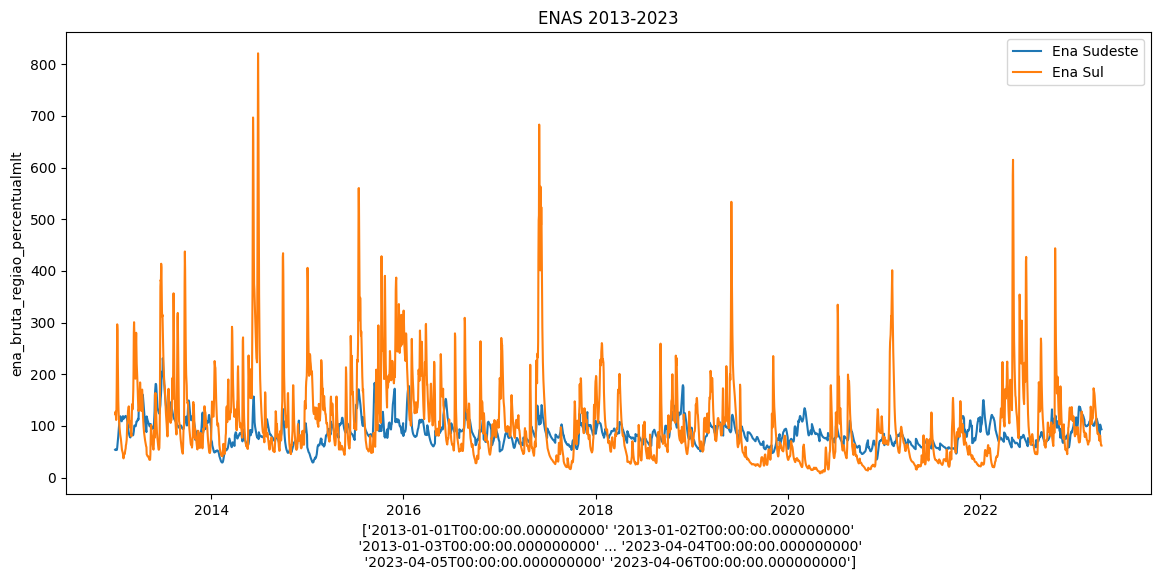

In [ ]:
# Set the width and height of the figure


# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("ENAS 2013-2023")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=dados[dados['id_subsistema']== 'SE'].groupby('ena_data').mean()['ena_bruta_regiao_percentualmlt']
, label="Ena Sudeste")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=dados[dados['id_subsistema']== 'S'].groupby('ena_data').mean()['ena_bruta_regiao_percentualmlt']
, label="Ena Sul")

# Add label for horizontal axis
plt.xlabel(dados['ena_data'].unique())

# ENA - Realizado

In [ ]:
def ena_por_subs(subs):
    # faz um agrupamento por ena mensal e coloca formatado em uma tabela onde as colunas sao os anos
    df_ena_month = df_percentualmlt[df_percentualmlt['id_subsistema']== subs ]

    df_ena_month['mes'] = df_ena_month['ena_data'].dt.month
    df_ena_month['ano'] = df_ena_month['ena_data'].dt.year

    pmlt_se_mes = df_ena_month.pivot_table(  index = ['mes'], columns = ['ano'], values = ['perc_mlt']).round(decimals = 0)
    teste = pd.DataFrame(pmlt_se_mes)
    return teste

def ena_por_subs_mwmed_dia(subs):
    # ainda nao funciona
    # queria agrupar em dias mas falta diferenciar o mes tambem 
    df_ena_month = df_ena_bruta_regiao_mwmed[df_ena_bruta_regiao_mwmed['id_subsistema']== subs ]

    df_ena_month['mes'] = df_ena_month['ena_data'].dt.month
    df_ena_month['ano'] = df_ena_month['ena_data'].dt.year
    df_ena_month['dia'] = df_ena_month['ena_data'].dt.day

    pmlt_se_mes = df_ena_month.pivot_table(  index = ['dia'], columns = ['ano'], values = ['ena_bruta_regiao_mwmed']).round(decimals = 0)
    teste = pd.DataFrame(pmlt_se_mes)
    return teste

def posicao_historico(df_ena):
    df_ena[('perc_mlt', 'Min')] = df_ena.min(axis=1)
    df_ena[('perc_mlt', 'Max')] = df_ena.max(axis=1)
    return df_ena

In [ ]:
##df_ena_bruta_regiao_mwmed['ena_data'].dt.day
#ena_por_subs_mwmed('SE')

In [ ]:

se = ena_por_subs('SE')
s= ena_por_subs('S')
ne= ena_por_subs('NE')
n= ena_por_subs('N')

<ipython-input-17-94ee856d8cef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ena_month['mes'] = df_ena_month['ena_data'].dt.month
<ipython-input-17-94ee856d8cef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ena_month['ano'] = df_ena_month['ena_data'].dt.year
<ipython-input-17-94ee856d8cef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
se.columns

MultiIndex([('perc_mlt', 2013),
            ('perc_mlt', 2014),
            ('perc_mlt', 2015),
            ('perc_mlt', 2016),
            ('perc_mlt', 2017),
            ('perc_mlt', 2018),
            ('perc_mlt', 2019),
            ('perc_mlt', 2020),
            ('perc_mlt', 2021),
            ('perc_mlt', 2022),
            ('perc_mlt', 2023)],
           names=[None, 'ano'])

In [ ]:
posicao_historico(se)

perc_mlt                                                               \
ano     2013   2014   2015   2016   2017   2018  2019   2020  2021   2022   
mes                                                                         
1       89.0   54.0   40.0  128.0   68.0   97.0  64.0   75.0  70.0  108.0   
2      104.0   40.0   60.0   87.0   72.0   83.0  66.0  105.0  72.0  108.0   
3       97.0   64.0   79.0   99.0   68.0   89.0  97.0  103.0  75.0   76.0   
4      133.0   82.0   89.0   73.0   74.0   90.0  97.0   87.0  63.0   74.0   
5      104.0   75.0  100.0   90.0  100.0   78.0  97.0   80.0  63.0   67.0   
6      157.0  100.0   89.0  121.0  106.0   76.0  96.0   77.0  66.0   74.0   
7      152.0   84.0  133.0   91.0   80.0   70.0  86.0   79.0  61.0   65.0   
8      114.0   85.0   90.0  104.0   85.0   83.0  80.0   85.0  60.0   77.0   
9      103.0   82.0  119.0   95.0   66.0   82.0  70.0   66.0  56.0   82.0   
10     120.0   66.0   94.0   85.0   68.0  108.0  59.0   53.0  94.0  104.0   
11      89.0   68.0  118.0   88.0  103.0  129.0  63.0   60.0  93.0   78.0   
12     103.0   85.0  103.0   78.0   95.0   95.0  82.0   64.0  89.0   89.0   

                         
ano   2023   Min    Max  
mes                      
1    119.0  40.0  128.0  
2    105.0  40.0  108.0  
3    103.0  64.0  103.0  
4     98.0  63.0  133.0  
5      NaN  63.0  104.0  
6      NaN  66.0  157.0  
7      NaN  61.0  152.0  
8      NaN  60.0  114.0  
9      NaN  56.0  119.0  
10     NaN  53.0  120.0  
11     NaN  60.0  129.0  
12     NaN  64.0  103.0

In [ ]:
se.to_csv('/content/sample_data/' + 'ena_Se' + ".csv")  

#ENA - Previsão

<Axes: title={'center': 'ENAS 2013-2023'}, xlabel='mes'>

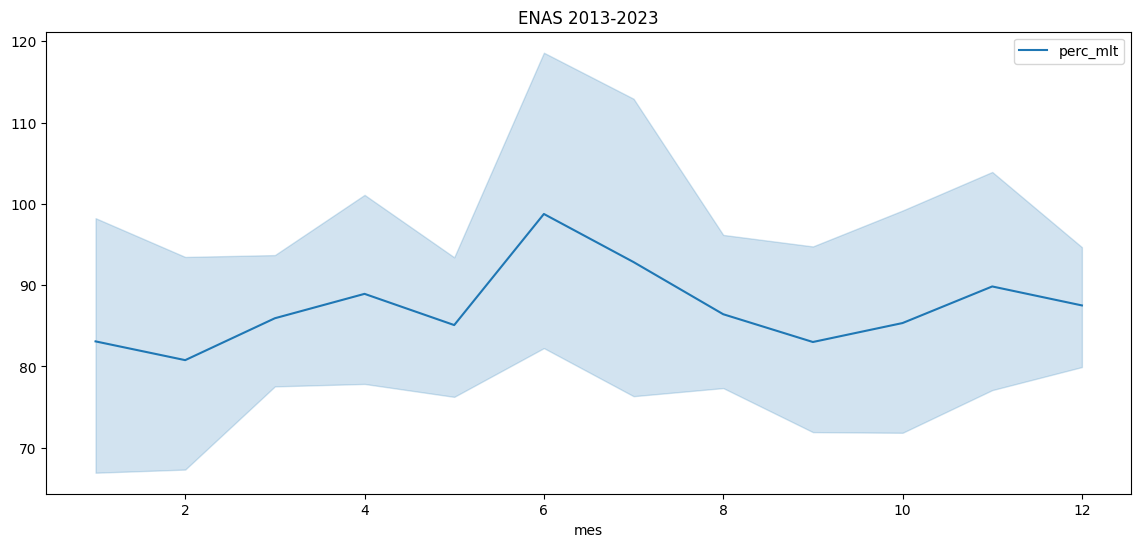

In [ ]:
plt.figure(figsize=(14,6))
plt.title("ENAS 2013-2023")

sns.lineplot(data=se)


In [ ]:
#se[(  'EC')][3] = 102.0
#se[('perc_mlt', 'EC')][4] = 97.0
#se[('perc_mlt', 'EC')][5] = 107.0

In [ ]:
#pmlt_se_mes.reset_index(inplace=True)


In [ ]:
#pmlt_se_mes.melt(id_vars='mes',value_vars = ['2020', '2021'], var_name='ano',
#             value_name='ena')

#Gerar arquivo saida

In [ ]:
dados[dados['ena_data']>='2023-02-22'].to_csv('C:\\Users\\thais.carvalho\\Desktop\\processos manha\\out.csv')  

2022-03-20
2022-04-07


<ipython-input-31-c47212cc6aca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week['ano anterior'] = last_year["ena_bruta_regiao_mwmed"]


<Axes: title={'center': 'SE'}, xlabel='data', ylabel='ENA (MWm)'>

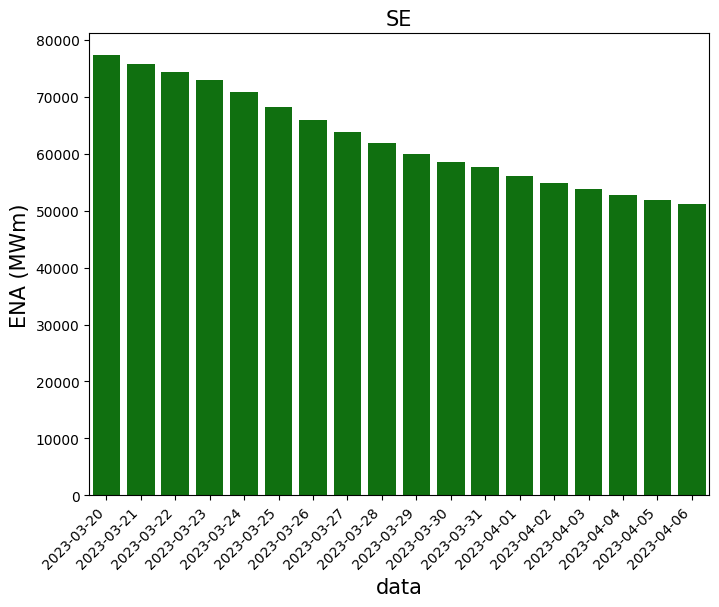

In [ ]:
plt.figure(figsize=(8,6))

data_inicio  = '2023-03-20'
sub='SE'

# consultar os dados de 1 semana atras
last_week = dados.query("ena_data >= @data_inicio  & id_subsistema == @sub ")

# comparar com 1 ano atras 
td = timedelta(-365)
ano_passado = pd.DataFrame( last_week['ena_data'] + td)
len(ano_passado)

data_inicio_last_year = datetime.strptime(data_inicio,'%Y-%m-%d').date() + td
print(data_inicio_last_year)
data_fim_last_year =  data_inicio_last_year + timedelta(len(ano_passado))
print(data_fim_last_year)

last_year = dados.query("ena_data >= @data_inicio_last_year &  ena_data < @data_fim_last_year  & id_subsistema == @sub ")
#print(last_year)
last_week['ano anterior'] = last_year["ena_bruta_regiao_mwmed"]


# formatando o grafico
plt.title("Realizado ultima semana")
ax = sns.barplot(data=last_week, x="ena_data", y="ena_bruta_regiao_mwmed", color='green')
#sns.barplot(data=last_week, x="ena_data", y='ano anterior', color='pink')

ax.set_title(sub, fontsize = 15)

x_dates = last_week['ena_data'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

ax.set_xlabel('data',fontsize = 15)
ax.set_ylabel('ENA (MWm)',fontsize=15)

for p in ax.patches:
  height = p.get_height()
  #ax.text(p.get_x()+p.get_width()/2.,
  height + 20,
  '{:1.0f}'.format((height)),
  #ha='center')
ax
